In [1]:
# Скачиваем набор данных
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

--2021-12-19 23:57:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 108.177.12.128, 108.177.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   155MB/s    in 0.9s    

2021-12-19 23:57:52 (155 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
#Разархивируем
!unzip horse-or-human.zip

Archive:  horse-or-human.zip
  inflating: horses/horse01-0.png    
  inflating: horses/horse01-1.png    
  inflating: horses/horse01-2.png    
  inflating: horses/horse01-3.png    
  inflating: horses/horse01-4.png    
  inflating: horses/horse01-5.png    
  inflating: horses/horse01-6.png    
  inflating: horses/horse01-7.png    
  inflating: horses/horse01-8.png    
  inflating: horses/horse01-9.png    
  inflating: horses/horse02-0.png    
  inflating: horses/horse02-1.png    
  inflating: horses/horse02-2.png    
  inflating: horses/horse02-3.png    
  inflating: horses/horse02-4.png    
  inflating: horses/horse02-5.png    
  inflating: horses/horse02-6.png    
  inflating: horses/horse02-7.png    
  inflating: horses/horse02-8.png    
  inflating: horses/horse02-9.png    
  inflating: horses/horse03-0.png    
  inflating: horses/horse03-1.png    
  inflating: horses/horse03-2.png    
  inflating: horses/horse03-3.png    
  inflating: horses/horse03-4.png    
  inflating: horses/h

In [3]:
# Скачиваем
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip

--2021-12-19 23:58:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.128, 108.177.11.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2021-12-19 23:58:27 (108 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [4]:
# Разархивируем
!unzip validation-horse-or-human.zip

Archive:  validation-horse-or-human.zip
  inflating: horses/horse1-000.png   
  inflating: horses/horse1-105.png   
  inflating: horses/horse1-122.png   
  inflating: horses/horse1-127.png   
  inflating: horses/horse1-170.png   
  inflating: horses/horse1-204.png   
  inflating: horses/horse1-224.png   
  inflating: horses/horse1-241.png   
  inflating: horses/horse1-264.png   
  inflating: horses/horse1-276.png   
  inflating: horses/horse1-298.png   
  inflating: horses/horse1-335.png   
  inflating: horses/horse1-384.png   
  inflating: horses/horse1-411.png   
  inflating: horses/horse1-436.png   
  inflating: horses/horse1-455.png   
  inflating: horses/horse1-484.png   
  inflating: horses/horse1-510.png   
  inflating: horses/horse1-539.png   
  inflating: horses/horse1-554.png   
  inflating: horses/horse1-568.png   
  inflating: horses/horse2-011.png   
  inflating: horses/horse2-040.png   
  inflating: horses/horse2-069.png   
  inflating: horses/horse2-112.png   
  inflatin

In [5]:
# Импорт библиотек
import shutil
import os

In [6]:
# Создаём директории
!mkdir HuH

In [7]:
!cp -r /content/horses /content/HuH

In [8]:
!cp -r /content/humans /content/HuH

In [9]:
# Считаем кол-во изображений:
!ls /content/HuH/horses | wc -l

628


In [10]:
!ls /content/HuH/humans | wc -l

655


In [11]:
# Создаем переменные
data_dir = '/content/HuH/'
train_dir = 'train'
val_dir   = 'val'
test_dir  = 'test'
test_portion = 0.15
val_portion = 0.15
nb_images = 600

In [12]:
# Создаём папки для изображений
def create_dir(dir_name):
  
  if os.path.exists(dir_name):
    shutil.rmtree(dir_name)

  os.makedirs(dir_name)
  os.makedirs(os.path.join(dir_name, "horses1"))
  os.makedirs(os.path.join(dir_name, "humans1"))

In [13]:
create_dir(train_dir)
create_dir(test_dir)
create_dir(val_dir)

In [14]:
# Переименовываем изображения
def new_name (path):
  for root, dirs, files in os.walk(path):
    i = 0
    for fil in files:
      new_name = str(i) + ".png"
      new = os.path.join(root, new_name)
      old = os.path.join(root, fil)
      os.rename(old,new)
      i+=1

In [15]:
new_name('/content/HuH/horses')

In [16]:
new_name('/content/HuH/humans')

In [17]:
# Копируем изображения
def copy_images(st, ed, src, dst):
  for i in range(st, ed):
    shutil.copy2(os.path.join(src, "horses/" + str(i) + ".png"), os.path.join(dst, "horses1"))
    shutil.copy2(os.path.join(src, "humans/" + str(i) + ".png"), os.path.join(dst, "humans1"))

In [18]:
# Группируем изображения
start_val = int(nb_images * (1 - val_portion - test_portion))
start_tst = int(nb_images * (1 - test_portion))
print(start_val)
print(start_tst)

420
510


In [19]:
# Копируем их
copy_images(0, start_val, data_dir, train_dir)
copy_images(start_val, start_tst, data_dir, val_dir)
copy_images(start_tst, nb_images, data_dir, test_dir)

In [20]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
epochs = 2
batch_size = 128
nb_train   = 17500
nb_val     = 3750
nb_test    = 3750

In [21]:
# Генератор изображений:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
train_generator = datagen.flow_from_directory(train_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 840 images belonging to 2 classes.


In [24]:
val_generator = datagen.flow_from_directory(val_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 180 images belonging to 2 classes.


In [25]:
test_generator = datagen.flow_from_directory(test_dir, 
                                              target_size=(img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode='binary')

Found 180 images belonging to 2 classes.


In [26]:
# Перенос обучениия в Keras
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

In [27]:
# Загружаем сеть
model_net = MobileNetV2(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
model_net.trainable=False

9420800/9406464 [==============================] - 0s 0us/step


In [28]:
# Создаём нейронную сеть
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Activation, Dense
from keras.preprocessing.image import ImageDataGenerator

In [29]:
# Создаем составную сеть
model = Sequential()
model.add(model_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [30]:
# Составная сеть
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

In [31]:
# Компилируем составную сеть
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate = 1e-5)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [32]:
# Обучаем нейронную сеть
model.fit_generator(train_generator, 
                    steps_per_epoch = nb_train // batch_size,
                    epochs = 5,
                    validation_data  = val_generator,
                    validation_steps = nb_val // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
136/136 [==============================] - 50s 255ms/step - loss: 0.3444 - accuracy: 0.8417 - val_loss: 0.0169 - val_accuracy: 0.9944


In [33]:
# Оцениваем качество работы сети
scores = model.evaluate_generator(test_generator, nb_test // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


In [34]:
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

Аккуратность на тестовых данных: 100.00%


In [49]:
img = image.load_img('/content/HuH/humans/3.png', target_size=(224, 224,3))

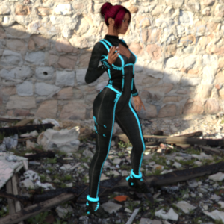

In [50]:
img

In [51]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [52]:
preds = model.predict(x)[0][0]

In [53]:
print(preds)

0.9990045


In [57]:
result = tf.sigmoid(preds)

In [64]:
pred_label = 'Horse' if result <= 0.51 else 'Human'

In [63]:
print(pred_label)

Human
